In [1]:
import  pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv("credit_risk_dataset.csv")
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [5]:
data['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [6]:
data['person_age'].nunique()

58

In [7]:
data.columns.value_counts()

person_age                    1
person_income                 1
person_home_ownership         1
person_emp_length             1
loan_intent                   1
loan_grade                    1
loan_amnt                     1
loan_int_rate                 1
loan_status                   1
loan_percent_income           1
cb_person_default_on_file     1
cb_person_cred_hist_length    1
Name: count, dtype: int64

In [8]:
# Separate based on data types
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nAutomatically detected numeric columns: {numeric_columns}")
print(f"Automatically detected categorical columns: {categorical_columns}")


Automatically detected numeric columns: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']
Automatically detected categorical columns: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
data.select_dtypes(include=[np.number]):
This tells pandas to select only numeric columns (int, float, etc.).

.columns:
Extracts the column names of those numeric columns.

.tolist():
Converts the column names to a regular Python list.

In [9]:
data.describe(include='all')


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


To fill up the Null values We will be doing Null value Imputation method:
----------------------------------------------------------------------------------------------------------------

Null Values Imputation (All Methods)
Dropping the Data Point: Sometimes Dropping the Null values is the best possible option in any ML project. One of the Efficient approach/case where you should use this method is where the number of Null values in the feature is above a certain threshold like for example, based on our domain knowledge we made a decision that if the number of null values are greater than 50% of the total number of data points then we will drop the feature. Drawback of this method is that, If you drop the column you might end up losing critical information.

Mean Imputation: This is the most common method to impute missing data. In this method we just replace the null values with the mean value of the feature. This method is used for numerical features. Although this is most common method, one should not blindly use this method because it is prone to outliers and may affect the model performance drastically.

Median Imputation: In order to overcome the drawback of the mean imputation which is that it is sensetive to outliers, One common approach which is used by ML Engineers is that rather than imputing mean value, they impute the median. Although there are no direct drawbacks of using this method but you would want to consider plotting the distribution of the feature before applying this method.

Mode Impuation: For Imputing the null values present in the categorical column we used mode impuation. In this method the class which is in majority is imputed in place of null values. Although this method is a good starting point, I prefer imputing the values according to the class weights in order to keep the distribution of the data uniform.

Regression/Classification Imputation : In this method we train an ML Model, Regression or Classification for Numerical or Categorical Missing Data Column respectively and then let the model predict the missing values. One of the most favourable algorithm to implement this method is KNN because it takes distance between two data points in n-dimentional vector space into account. This method is also referred to as "nearest neighbour imputation".

Last Observation Carried Forward(LOCF): In this method the value of the last Data Point from the previous row is taken and used to fill the Missing value. One might wonder that why should I use this imputation approach, the reason is that when you work with Time Series data, you cannot just pick mean/median value to impute because if you choose mean/median Imputation then the seasonality pattern (which is the main reason we wish to choose Time series data in the first place which is to observe seasonality) gets disturbed and you might end up misinterpreting the data for the model.

Next Observation Carried Backward(NBCB): Same as the above method, the difference is that this time we take the next data point's value to impute the null value.

Maximum-Likelihood: In this method, first all the null values are removed from the data. Then the distribution of the column is finded. Then the Parameters corresponding to the distribution(mean and standard deviation) is calculated. and then the missing values are imputed by sampling points from that distribution.

Multiple Imputation: This method is like Bagging based ensemble of Regression/Classification
Imputation method, what I mean by that is, Regression/Classification Imputation is used Multiple times instead of a Single time and mean or voting methods is applied respectively to generalize the results

In [11]:
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [12]:
def analyze_missing_values(data):
    """Comprehensive analysis of missing values"""
    missing_info = pd.DataFrame({
        'Column': data.columns,
        'Missing_Count': data.isnull().sum(),
        'Missing_Percentage': (data.isnull().sum() / len(data)) * 100,
        'Data_Type': data.dtypes
    })
    missing_info = missing_info[missing_info['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
    
    print("Missing Values Summary:")
    print(missing_info)
    return missing_info

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())
print("\n" + "="*50)

missing_info = analyze_missing_values(data)
print("Missing info:", missing_info)

Missing values per column:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Missing Values Summary:
                              Column  Missing_Count  Missing_Percentage  \
loan_int_rate          loan_int_rate           3116            9.563856   
person_emp_length  person_emp_length            895            2.747000   

                  Data_Type  
loan_int_rate       float64  
person_emp_length   float64  
Missing info:                               Column  Missing_Count  Missing_Percentage  \
loan_int_rate          loan_int_rate           3116            9.563856   
person_emp_length  person_emp_lengt

Text(0, 0.5, 'Missing Percentage')

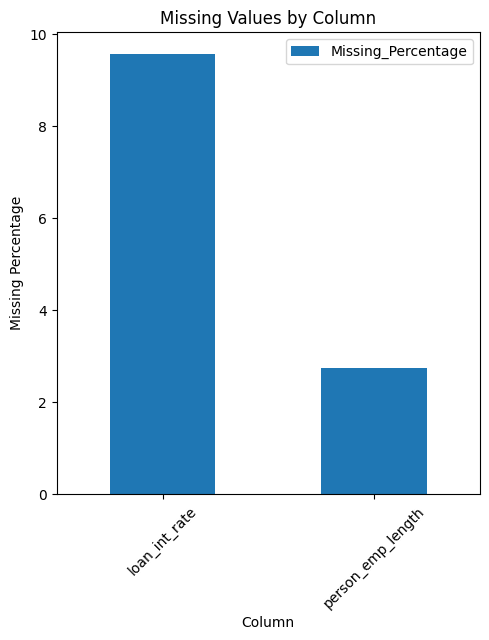

In [13]:
# Visualize missing values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
missing_info.plot(x='Column', y='Missing_Percentage', kind='bar', ax=plt.gca())
plt.title('Missing Values by Column')
plt.xticks(rotation=45)
plt.ylabel('Missing Percentage')

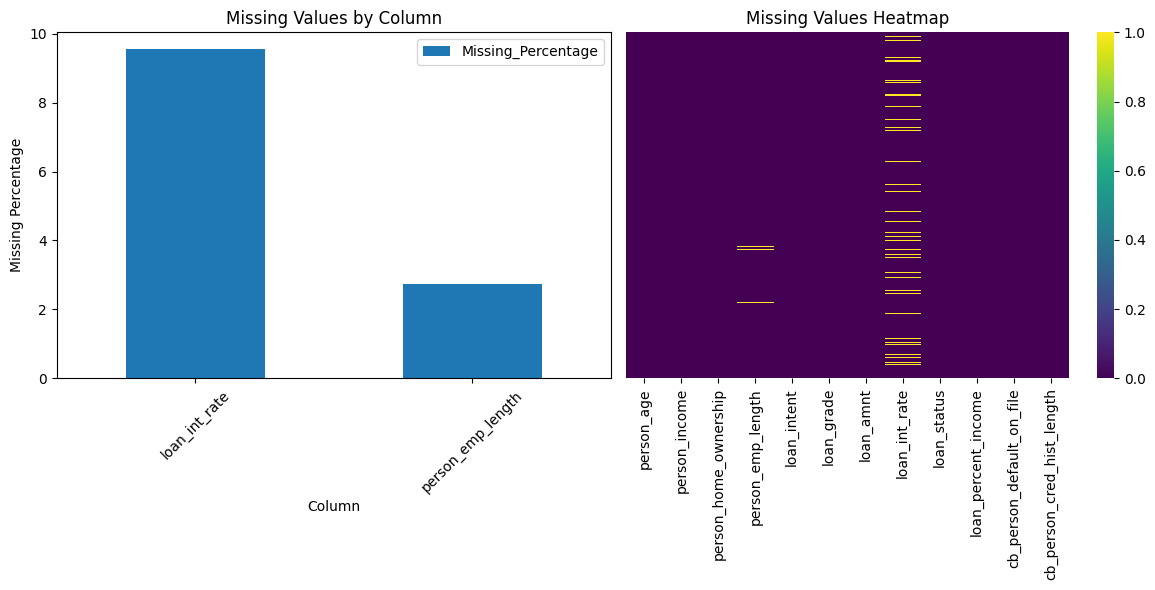

In [14]:
# Visualize missing values
if not missing_info.empty:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    missing_info.plot(x='Column', y='Missing_Percentage', kind='bar', ax=plt.gca())
    plt.title('Missing Values by Column')
    plt.xticks(rotation=45)
    plt.ylabel('Missing Percentage')
    
    plt.subplot(1, 2, 2)
    sns.heatmap(data.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")

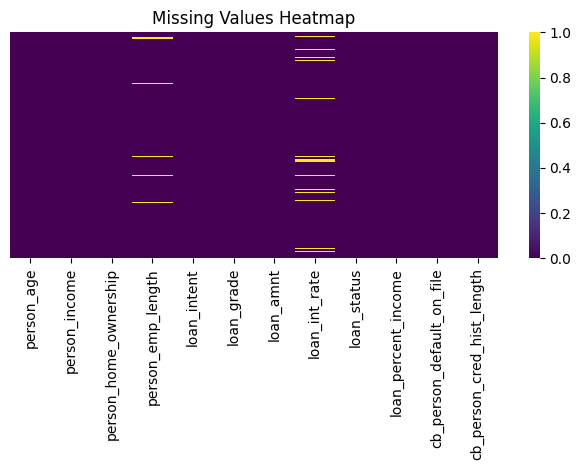

In [15]:
sns.heatmap(data.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

| Imputer                                     | Best For                                          | Pros                                             | Cons                                        |
| ------------------------------------------- | ------------------------------------------------- | ------------------------------------------------ | ------------------------------------------- |
| **SimpleImputer** (mean/median)             | Numeric data, fast baseline                       | Fast, easy                                       | Ignores relationships, oversimplified       |
| **KNNImputer**                              | Structured data, correlated features              | Uses similarity across rows                      | Slow for large data, sensitive to scaling   |
| **IterativeImputer** (like MICE)            | Strong multicollinearity, missing in many columns | Uses multiple regressions, preserves correlation | Computationally expensive                   |
| **LinearRegression (custom)**               | When missing depends linearly on other features   | More interpretable, model-based                  | Only works for linearly related data        |
| **RandomForestImputer** (custom)            | Non-linear relationships                          | Captures complex patterns                        | Slower, may overfit                         |
| **Deep Learning-based** (like Autoencoders) | Very complex patterns (big datasets)              | High accuracy                                    | Very complex setup, overkill for small data |


| **Dataset Size**                                              | **Best Imputer**                                                                                 | **Why?**                                                                                              |
| ------------------------------------------------------------- | ------------------------------------------------------------------------------------------------ | ----------------------------------------------------------------------------------------------------- |
| **Very Small**<br>(< 500 rows)                                | `SimpleImputer` (mean/median) or `KNNImputer` (k=1 to 3)                                         | KNN works well with small, dense data. Simple methods are robust when data is too small for modeling. |
| **Small to Medium**<br>(500–5,000 rows)                       | `KNNImputer` or `IterativeImputer` (with Linear Regression or Bayesian Ridge)                    | KNN gives local smoothness. Iterative methods work well with moderate features and missing values.    |
| **Medium to Large**<br>(5,000–50,000 rows)                    | `IterativeImputer` or custom ML models (like Linear Regression, Random Forest)                   | Iterative is scalable; custom models give better control over which features to use.                  |
| **Large**<br>(50,000+ rows)                                   | `IterativeImputer` (with simpler estimator) or **lightweight ML models** (e.g. Ridge Regression) | KNN becomes **too slow** here. Use model-based methods, but keep them efficient.                      |
| **Very Large / Big Data**<br>(100,000+ rows or 100+ features) | Distributed imputation (e.g., Spark or Dask + ML) or Deep Learning (Autoencoders)                | Use batch-wise or neural imputers. Standard sklearn methods may not scale well.                       |


In [16]:
import pandas as pd

# Example: correlation between 'person_age' and 'loan_amnt'
correlation = data['loan_int_rate'].corr(data['person_emp_length'])
print(f"Correlation loan interest rate and person emp length: {correlation}")


Correlation loan interest rate and person emp length: -0.05640481247909157


before moving to the main topic lets understand :
1.alwaays scaled the data using standard scaler. which promotes standaridazaton and normalization.
2.see the data is numerical or categorical :
        if it is categorical firstly covvert to numrical using label encoder and one hot encoding.
        then only scaling need tobe done.

3.--`Label Encoding`:
- Label encoding is a technique used to convert categorical data into numerical data.
- Each category is mapped to a number (e.g., "Red" → 0, "Blue" → 1, "Green" → 2).
Use case: Suitable for ordinal data where categories have a natural order (e.g., "Low," "Medium," "High").
--------------------------------------------------------------------------------------------------------
Categories: ["Red", "Blue", "Green"]
Label Encoding: [0, 1, 2]
---------------------------------------------------------------------------------------------------------

4.One-Hot Encoding

- One-hot encoding is a technique used to convert categorical data into numerical data.
-------------------------------------------------------------------------------------------------------
Categories: ["Red", "Blue", "Green"]
One-Hot Encoding:
Red:  [1, 0, 0]
Blue: [0, 1, 0]
Green:[0, 0, 1]
-------------------------------------------------------------------------------------------------------
usecase:
Use label encoding for ordinal data or tree-based models (e.g., decision trees, random forests) that can handle integer-encoded categories without assuming order.
Use one-hot encoding for nominal data and models like linear regression, logistic regression, or neural networks, where numerical relationships matter.


        

Bayesian Ridge Regression is a linear regression model that uses Bayesian inference to estimate model parameters and make predictions. It predicts a target value ( y ) as a linear combination of features ( X ), incorporating priors to regularize the model and handle uncertainty. In IterativeImputer, it predicts missing values by modeling each feature with missing data as a function of other features.




 how machines make market trends or the weather a part of the answer lies in a concept called
predictions .
how they guess the stock
byesian linear regression ?
Dive Into the
Heart of machine learning where we
unravel the mystery of Bayesian linear
regression step by step imagine you have
-------------------------------------------------
a bunch of data points these could be
anything stock prices weather data or
sales figures a key question that arises
is how to create a model that can
accurately predict future data points
based on the ones you currently have
this is where Bayesian linear regression
comes in first
----------------------------------------------------------
 it's important to
understand what linear regression is
it's a statistical model that attempts
to depict the relationship between two
variables by fitting a linear equation
to observe data the steps to conduct a
linear regression are quite simple first
a line of best fit is drawn through the
data points this line is the linear
equation that best represents the data
----------------------------------------------------------------
however traditional linear regression
has its limitations it assumes that
every prediction made is equally likely
which is not always the case in real
life scenarios enter by Asian linear
------------------------------------------------------------------
regression it takes the concept of
linear regression and adds a Twist
instead of assuming that all predictions
are equally likely by  linear
regression incorporates prior knowledge
or belief about the parameters this
prior knowledge is represented as a
probability distribution this is the
------------------------------------------------------------------
first step in byesian linear regression
defining the prior distribution this
distribution represents our belief about
the parameters before we've seen any
----------------------------------------
data the second step is to incorporate
the observed data this is done through
the likelihood function which is a
mathematical function that describes the
likelihood of our data given the
parameters the third and final step is
-------------------------------------------
to combine the prior distribution and
the likelihood function this is done
using Bayes theorem which gives us the
posterior distribution our updated
belief about the parameters after we've
seen the data the beauty of biasian
----------------------------------------
linear regression lies in its
flexibility with each new piece of data
the model updates its beliefs about the
parameters allowing it to adapt and
improve over time to summarize Bayesian
--------------------------------------------
linear regression is a powerful tool in
machine learning that uses prior
knowledge to make more accurate
predictions it starts with a prior
distribution incorporates observed data
through the likelihood function and
combines these using Bayes theorem to
get the posterior distribution this
process allows the model to constantly
update and adapt making it a dynamic and
effective tool for prediction remember
----------------------------------------------------
Bayesian linear regression isn't just a
dry statistical concept it's a key part
of the magic behind machine learning
helping to transform raw data into
accurate predictions and insights


In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

In [18]:
# Copy to avoid modifying original
df_impute = data.copy()

In [19]:
df_impute

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


----------------------------------------------------------------------------------------------------------
`Ridge regression`:
----  `Ridge Regression is a type of regularized linear regression that adds a penalty (shrinkage) to the model coefficients to prevent overfitting.
--In OLS (Ordinary Least Squares), we minimize:`|
--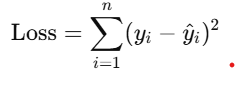

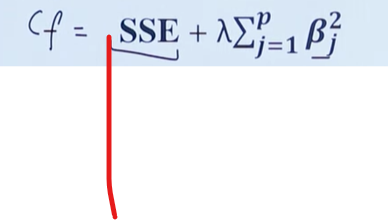

When do you use Ridge-regression:
----
    You're trying to predict someone's weight based on a bunch of factors like:

Age

Height

Income

Favorite pizza topping
----------------------------------------------------------------------------------------------------------

When you have too many factors, or some of them are too similar, the model starts to overthink (overfit).
It starts seeing patterns that don’t really exist, and performs badly on new data.
-----------------------------------------------------------------------------------------------------------
Ridge regression says:

"Hey model! I want you to fit the data, but don’t go crazy with the coefficients (the importance of each feature). Keep them small and balanced."

It adds a penalty to the model if it gives too much importance to any one feature.

| Concept                       | Explanation                                                                          |
| ----------------------------- | ------------------------------------------------------------------------------------ |
|  **Prior** on weights        | Assume weights $w \sim \mathcal{N}(0, \lambda^{-1}I)$ — a Gaussian prior.            |
|  **Likelihood**              | Model how likely the data is given the weights.                                      |
|  **Bayes’ Theorem**          | Combine prior and likelihood to get **posterior** (updated belief about weights).    |
|  **Estimate λ and α**        | Hyperparameters (noise and regularization) are **learned from the data**, not fixed. |
|  **Predictive Distribution** | You get **predictions with confidence intervals** — not just a point value.          |


| Aspect                          | Ridge Regression | Bayesian Ridge Regression      |
| ------------------------------- | ---------------- | ------------------------------ |
| Adds L2 regularization          |  Yes            |  Yes (via prior distribution) |
| Shrinks coefficients            |  Yes            |  Yes                          |
| Solves multicollinearity issues |  Yes            |  Yes                          |
| Improves generalization         |  Yes            |  Yes                          |


`ridge gives you:
Coefficients: [0.52, -1.34, 0.73]`

`Bayesian Ridge gives you:
Coefficients: [0.52, -1.34, 0.73]
Uncertainty: [±0.05, ±0.02, ±0.06]
→ So you know how confident it is in each estimate`

`Bayesian Ridge ≈ Ridge + Bayesian interpretation + confidence intervals + auto λ tuning.`


`Ridge: “The best guess for weight is exactly 0.65.” `

` Bayesian Ridge: “I believe the weight is around 0.65 ± 0.1, based on the data `
`

If there is multicollinearity (highly correlated features)

Or the dataset is small, noisy, or overparameterized

| Aspect                      | **Ridge Regression**      | **Bayesian Ridge Regression**                      |
| --------------------------- | ------------------------- | -------------------------------------------------- |
| **Speed**                   |  Very Fast              |  Slower (more computation)                       |
| **Interpretability**        | Simple coefficients       | Coefficients + Uncertainty (harder to interpret)   |
| **Regularization strength** | Manually chosen (`alpha`) | Automatically learned from data                    |
| **Predictions**             | Single number             | Prediction + Confidence Interval                   |
| **Uncertainty Estimation**  |  No                      |  Yes                                              |
| **Small/Noisy Data**        |  Prone to overfitting    |  Handles uncertainty better                       
| **Correlated Features**     |  Handles well            |  Handles well                                     |
| **Use in production**       |  Common                  |  Used when you need uncertainty (e.g., medicine) |
| **Scikit-learn Models**     | `Ridge()`                 | `BayesianRidge()`                                  |


What Does IterativeImputer Do?
--It predicts each column with missing values as a regression problem.

It uses other columns (numerical + categorical) as features.

Since your missing columns are numerical, a regression model (like BayesianRidge) is a perfect fit.

why encode categorical data also?
---Even though you're imputing numeric columns, categorical features must be converted to numbers so the regression model can use them as inputs.

-----------------------------------
So we use LabelEncoder to convert things like:
loan_grade: A → 0, B → 1, ..., G → 6
loan_intent: EDUCATION → 0, MEDICAL → 1, ...
This lets the imputer model use these features as predictors.

Target columns with missing values: loan_int_rate, person_emp_length (numerical)
Predictor columns: all other columns, including encoded categorical ones.

| Task               | What to Do                                                  |
| ------------------ | ----------------------------------------------------------- |
| Missing columns    | Both are numeric                                            |
| Feature types used | Numeric + LabelEncoded Categorical                          |
| Model used inside  | Regression (BayesianRidge is default)                       |
| Encoding required? | Yes, for categorical features                               |
| Scaling needed?    | Not necessary for BayesianRidge (but good for other models) |


Label encoding is a technique used to convert categorical data into a numerical format by assigning a unique integer to each category. This is often necessary because many machine learning algorithms require numerical input. It's a straightforward method, especially useful when dealing with ordinal data where there's a natural order between categories. 


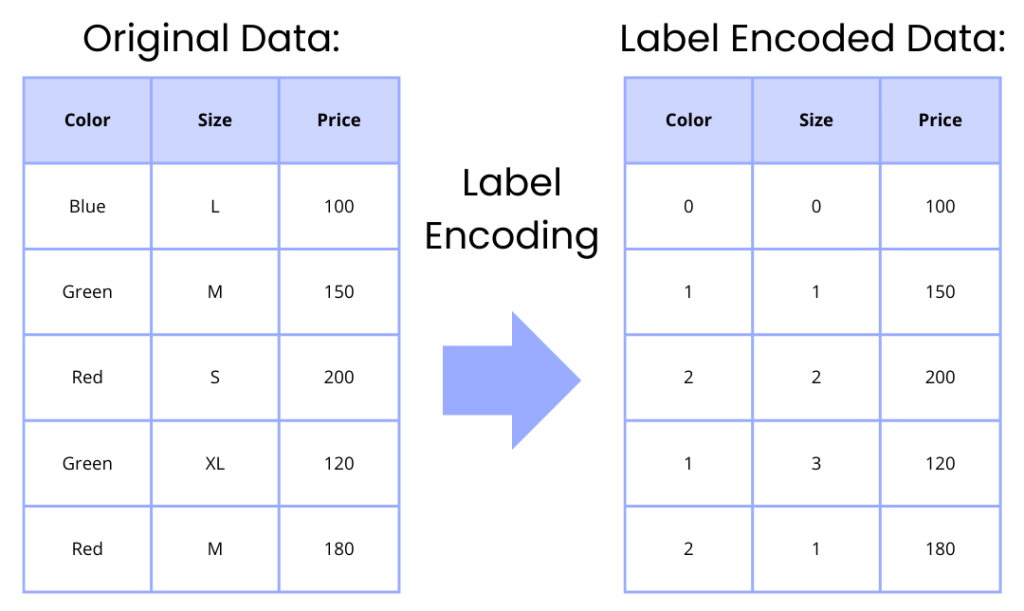

In [20]:
# Check if there are any missing values to impute
if df_impute.isnull().sum().sum() > 0:
    print("Applying iterative imputation...")

Applying iterative imputation...


In [21]:
# Check if there are any missing values to impute
if df_impute.isnull().sum().sum() > 0:
    print("Applying iterative imputation...")
    
    # 1. Encode categorical columns for imputation
    cat_cols = df_impute.select_dtypes(include='object').columns
    encoders = {}
    
    for col in cat_cols:
        le = LabelEncoder()
        df_impute[col] = le.fit_transform(df_impute[col].astype(str))
        encoders[col] = le # Save encoder in case you need to decode later
"""
 Iterates over each categorical column:

Converts values to string (safe against NaN or numbers).

Applies LabelEncoder to convert categories to numbers (e.g., RENT → 0, OWN → 1).

Stores the encoder for decoding later (encoders[col]).
"""

Applying iterative imputation...


'\n Iterates over each categorical column:\n\nConverts values to string (safe against NaN or numbers).\n\nApplies LabelEncoder to convert categories to numbers (e.g., RENT → 0, OWN → 1).\n\nStores the encoder for decoding later (encoders[col]).\n'

In [22]:
# 2. Apply Iterative Imputer
# ----------------------------
from sklearn.linear_model import BayesianRidge

imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=42)
df_imputed_array = imputer.fit_transform(df_impute)

# Convert back to DataFrame
df_imputed = pd.DataFrame(df_imputed_array, columns=df_impute.columns)


| Parameter                   | Meaning                                                               |
| --------------------------- | --------------------------------------------------------------------- |
| `estimator=BayesianRidge()` | Use Bayesian Ridge to fill in missing values numerically.             |
| `max_iter=10`               | Make 10 iterations for better accuracy (repeats imputation 10 times). |
| `random_state=42`           | Ensures reproducibility of results (same result every time you run).  |


In [23]:
 # 3. Decode categorical columns back to original labels
 # 3. Decode categorical columns back to original labels
for col in cat_cols:
        le = encoders[col]
        df_imputed[col] = df_imputed[col].round().astype(int)
        df_imputed[col] = le.inverse_transform(df_imputed[col])
    
print("Imputation completed!")
print("Missing values after imputation:")
print(df_imputed.isnull().sum())

Imputation completed!
Missing values after imputation:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [24]:
print("Final check - missing values:")
print(df_imputed.isnull().sum())
print(f"\nDataset shape after imputation: {df_imputed.shape}")

Final check - missing values:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Dataset shape after imputation: (32581, 12)


In [25]:
# 4. Done — Check nulls
# ----------------------------
print(df_imputed[['loan_int_rate', 'person_emp_length']].isnull().sum())

loan_int_rate        0
person_emp_length    0
dtype: int64


-- Key Notes
IterativeImputer is ideal here because both loan_int_rate and person_emp_length likely correlate with income, loan amount, credit history, etc.

BayesianRidge is used as a base estimator, but you could also try DecisionTreeRegressor or RandomForestRegressor if relationships are nonlinear.

Label encoding allows the imputer to treat categorical features as numeric. Later, you can reverse-transform them.

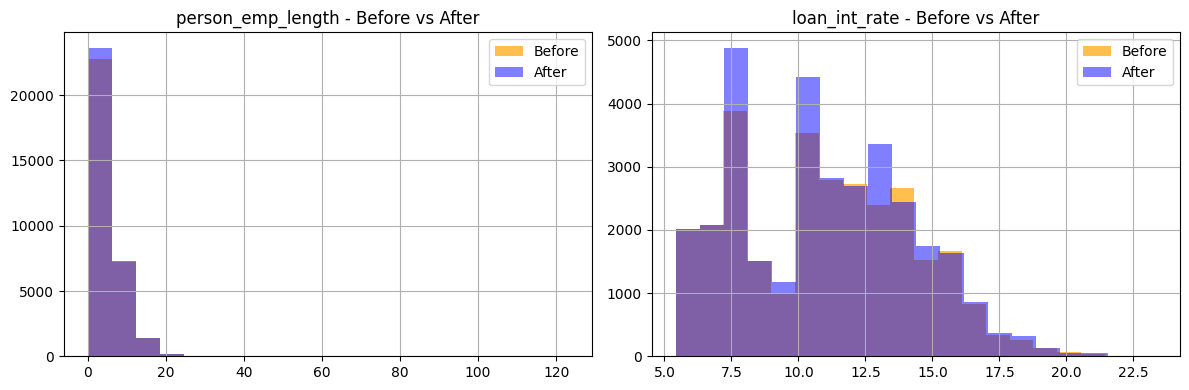

In [26]:
# Only create comparison plots if imputation was actually performed
if df_impute.isnull().sum().sum() > 0:
    # Check which columns had missing values
    missing_cols = df_impute.columns[df_impute.isnull().any()].tolist()
    
    if len(missing_cols) > 0:
        fig, axes = plt.subplots(1, len(missing_cols), figsize=(6*len(missing_cols), 4))
        if len(missing_cols) == 1:
            axes = [axes]
        
        for i, col in enumerate(missing_cols):
            data[col].hist(ax=axes[i], bins=20, color='orange', alpha=0.7, label='Before')
            df_imputed[col].hist(ax=axes[i], bins=20, color='blue', alpha=0.5, label='After')
            axes[i].set_title(f"{col} - Before vs After")
            axes[i].legend()
        
        plt.tight_layout()
        plt.show()
    else:
        print("No columns had missing values to compare")
else:
    print("No imputation was performed - no comparison needed")

In [27]:
print(df_imputed.isnull().sum())  # Should all be zero


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [28]:

df_imputed.describe().T    # Summary stats


,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,1.440000e+02
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6.000000e+06
person_emp_length,32581.0,4.781682,4.090297,0.00,2.00,4.00,7.00,1.230000e+02
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,3.500000e+04
loan_int_rate,32581.0,11.007645,3.214453,5.42,7.90,10.99,13.23,2.334332e+01
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.000000e+00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,8.300000e-01
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,3.000000e+01


In [29]:
df_imputed.to_csv("imputed_dataset.csv", index=False)


In [30]:
df_impute

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,2,5800,13.16,0,0.11,0,30
32577,54,120000,0,4.0,4,0,17625,7.49,0,0.15,0,19
32578,65,76000,3,3.0,2,1,35000,10.99,1,0.46,0,28
32579,56,150000,0,5.0,4,1,15000,11.48,0,0.10,0,26


Data types:
person_age                    float64
person_income                 float64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                     float64
loan_int_rate                 float64
loan_status                   float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length    float64
dtype: object



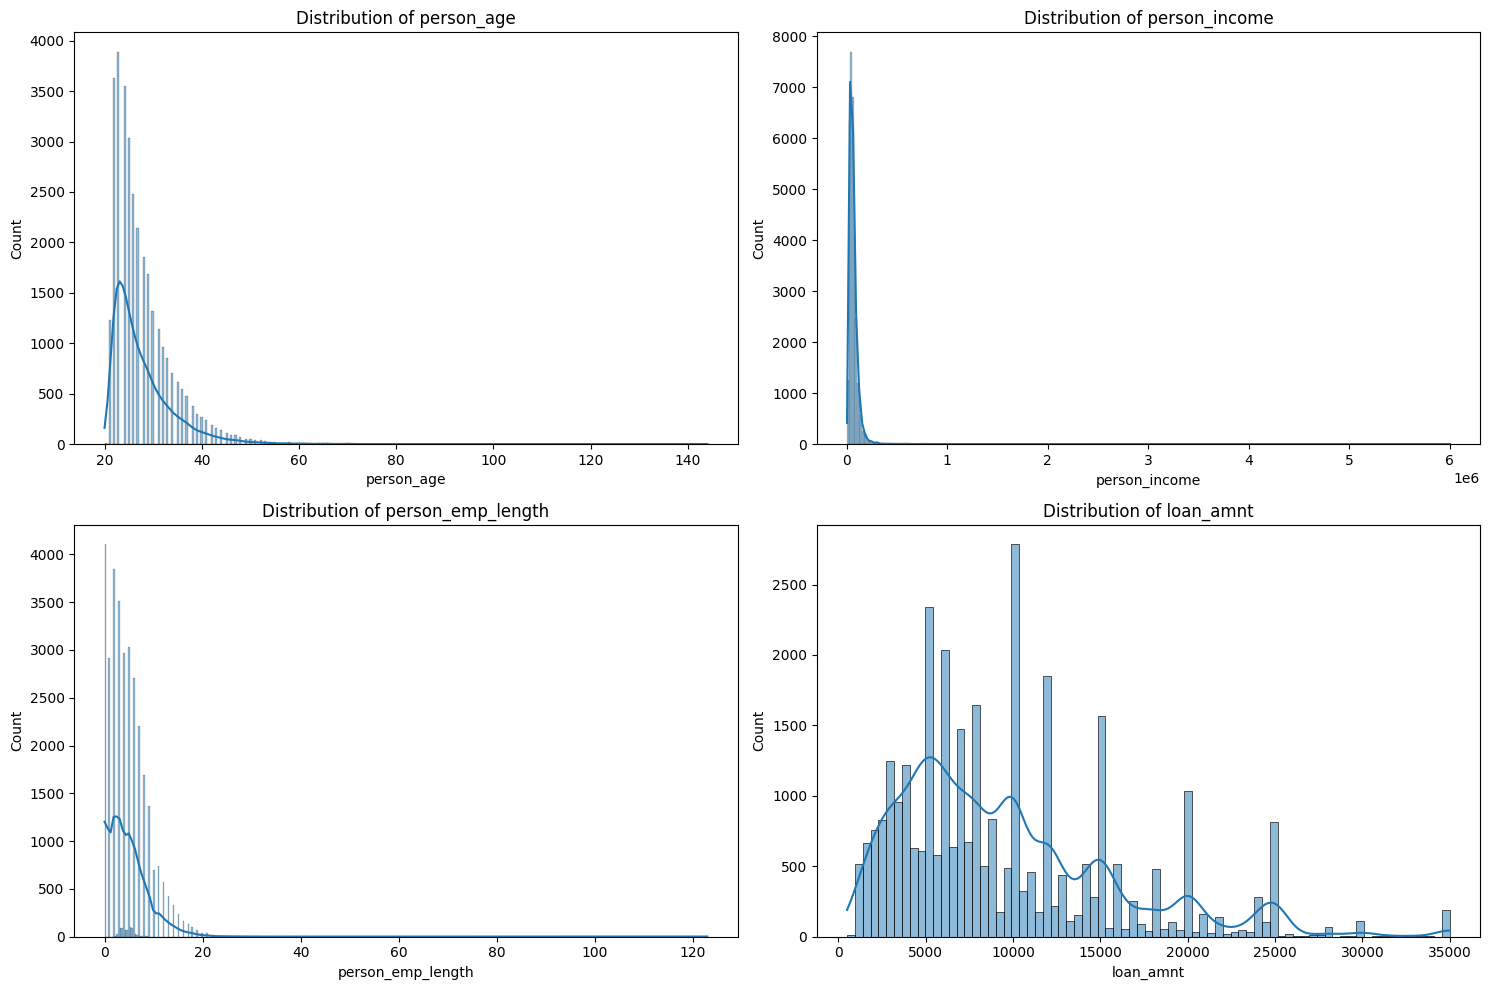

In [31]:
# Check data types # Plot distributions for key numeric columns

print("Data types:")
print(df_imputed.dtypes)
print("\n" + "="*40)

# Plot distributions for key numeric columns
numeric_cols = df_imputed.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols[:4]):  # Plot first 4 numeric columns
    sns.histplot(df_imputed[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [32]:
df_imputed.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

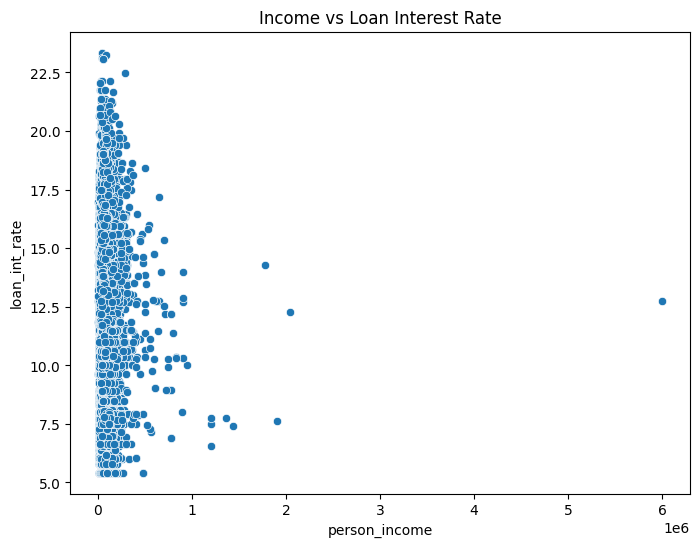

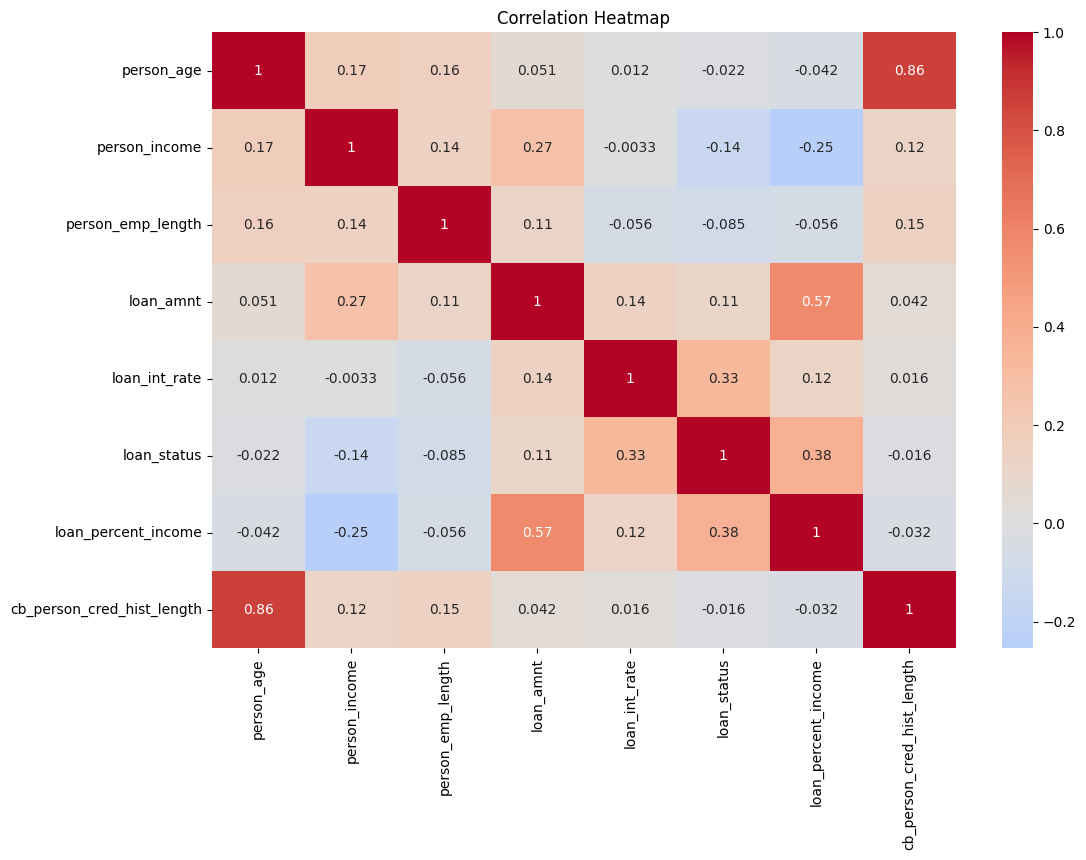

In [33]:
# Scatter plot example (adjust column names as needed)
if 'person_income' in df_imputed.columns and 'loan_int_rate' in df_imputed.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_imputed, x='person_income', y='loan_int_rate')
    plt.title("Income vs Loan Interest Rate")
    plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_imputed.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

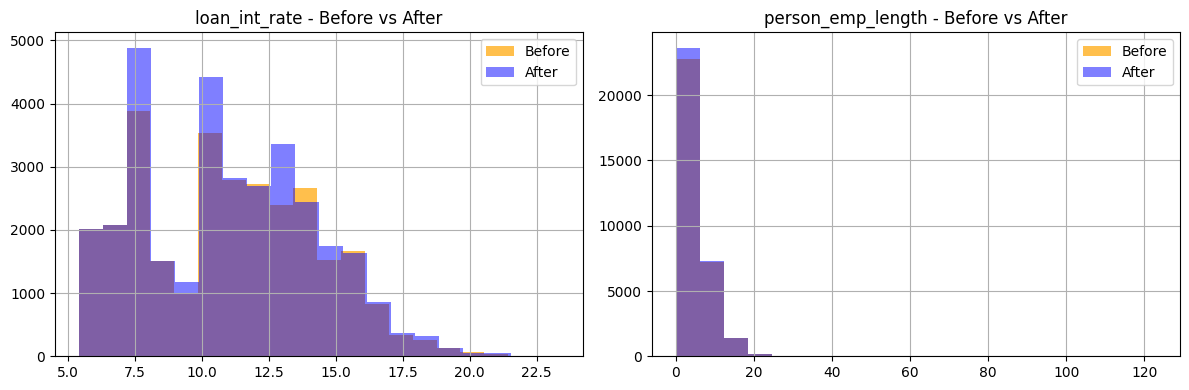

In [34]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# loan_int_rate
data['loan_int_rate'].hist(ax=axes[0], bins=20, color='orange', alpha=0.7, label='Before')
df_imputed['loan_int_rate'].hist(ax=axes[0], bins=20, color='blue', alpha=0.5, label='After')
axes[0].set_title("loan_int_rate - Before vs After")
axes[0].legend()

# person_emp_length
data['person_emp_length'].hist(ax=axes[1], bins=20, color='orange', alpha=0.7, label='Before')
df_imputed['person_emp_length'].hist(ax=axes[1], bins=20, color='blue', alpha=0.5, label='After')
axes[1].set_title("person_emp_length - Before vs After")
axes[1].legend()

plt.tight_layout()
plt.show()


In [35]:
df_imputed

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,RENT,123.0,PERSONAL,D,35000.0,16.02,1.0,0.59,Y,3.0
1,21.0,9600.0,OWN,5.0,EDUCATION,B,1000.0,11.14,0.0,0.10,N,2.0
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,12.87,1.0,0.57,N,3.0
3,23.0,65500.0,RENT,4.0,MEDICAL,C,35000.0,15.23,1.0,0.53,N,2.0
4,24.0,54400.0,RENT,8.0,MEDICAL,C,35000.0,14.27,1.0,0.55,Y,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57.0,53000.0,MORTGAGE,1.0,PERSONAL,C,5800.0,13.16,0.0,0.11,N,30.0
32577,54.0,120000.0,MORTGAGE,4.0,PERSONAL,A,17625.0,7.49,0.0,0.15,N,19.0
32578,65.0,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,35000.0,10.99,1.0,0.46,N,28.0
32579,56.0,150000.0,MORTGAGE,5.0,PERSONAL,B,15000.0,11.48,0.0,0.10,N,26.0


In [36]:
# Check data types
print(df_imputed.dtypes)

person_age                    float64
person_income                 float64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                     float64
loan_int_rate                 float64
loan_status                   float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length    float64
dtype: object


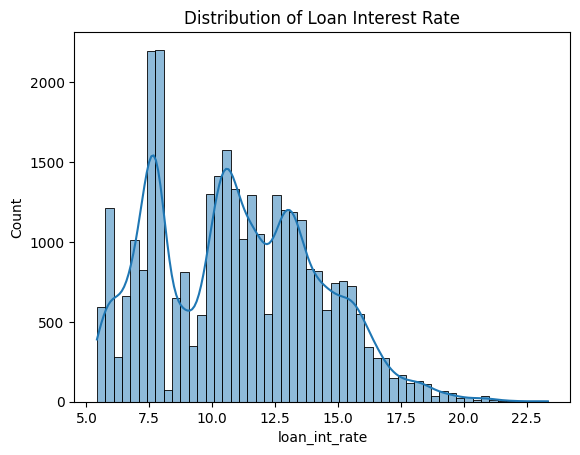

In [37]:
sns.histplot(df_imputed['loan_int_rate'], kde=True)
plt.title("Distribution of Loan Interest Rate")
plt.show()

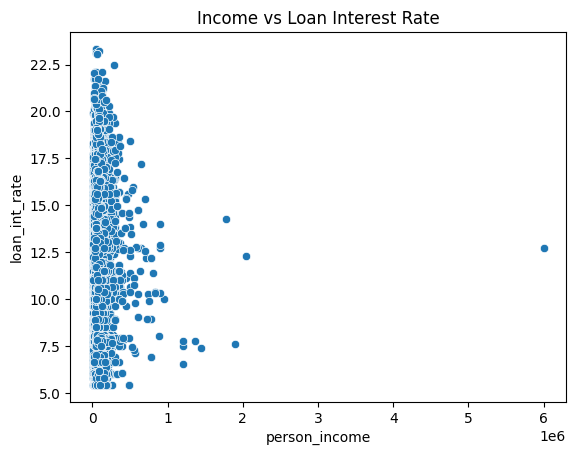

In [38]:
sns.scatterplot(data=df_imputed, x='person_income', y='loan_int_rate')
plt.title("Income vs Loan Interest Rate")
plt.show()

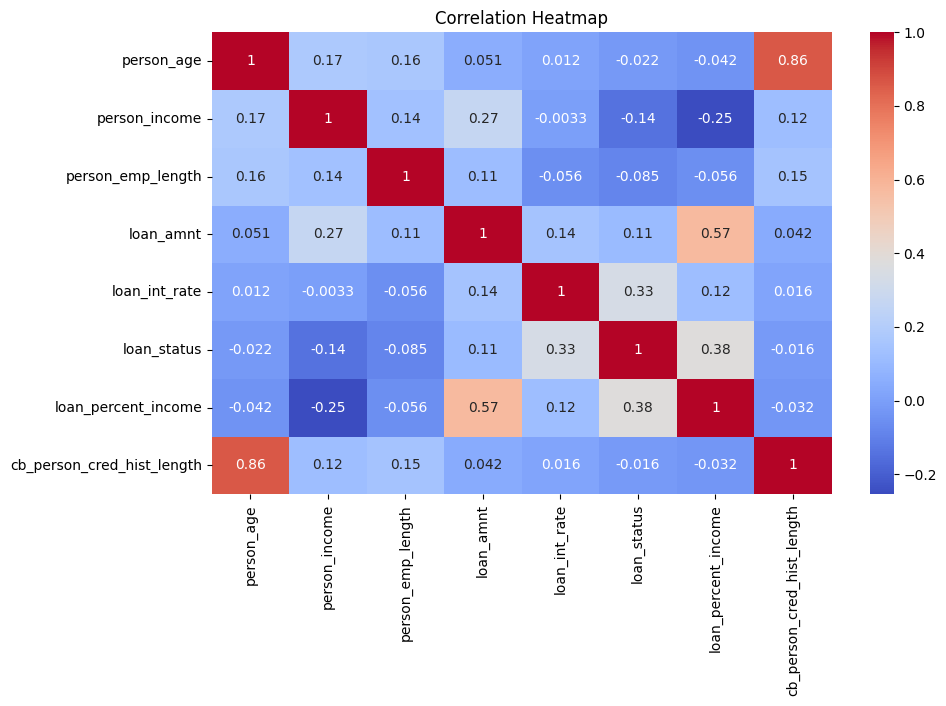

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_imputed.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [40]:
df_imputed.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [42]:
# Encode categorical variables for ML models
df_ml = df_imputed.copy()

# Apply label encoding to categorical columns
label_encoders = {}
categorical_cols = df_ml.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col])
    label_encoders[col] = le

print(f"Categorical columns encoded: {list(categorical_cols)}")
print("All columns are now numeric for ML models")

Categorical columns encoded: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
All columns are now numeric for ML models


In [43]:
# 3. Define Features and Target
# Define Features and Target
# Assuming 'loan_status' is the target variable
if 'loan_status' in df_ml.columns:
    X = df_ml.drop('loan_status', axis=1)
    y = df_ml['loan_status']
    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"Target distribution:\n{y.value_counts()}")
else:
    print("Target column 'loan_status' not found. Please specify the correct target column.")
    print("Available columns:", df_ml.columns.tolist())

Features shape: (32581, 11)
Target shape: (32581,)
Target distribution:
loan_status
0.0    25473
1.0     7108
Name: count, dtype: int64


In [44]:
# Train-Test Split
if 'loan_status' in df_ml.columns:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")
    print(f"Training target distribution:\n{y_train.value_counts()}")

Training set size: 26064
Test set size: 6517
Training target distribution:
loan_status
0.0    20378
1.0     5686
Name: count, dtype: int64


In [45]:
X_train

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15884,25.0,241875.0,0,4.000000,1,0,16000.0,7.05,0.07,0,4.0
15138,21.0,18000.0,3,5.000000,4,1,1500.0,12.18,0.08,0,4.0
7474,25.0,53000.0,0,10.000000,3,1,16000.0,12.53,0.30,0,2.0
18212,28.0,16800.0,2,3.632942,3,2,5000.0,13.98,0.30,0,8.0
6493,25.0,50000.0,0,2.000000,5,0,10000.0,7.90,0.20,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
14621,25.0,98000.0,0,9.000000,2,4,25000.0,16.45,0.26,0,4.0
18736,30.0,65000.0,3,0.000000,3,2,16000.0,13.06,0.25,0,8.0
1663,22.0,20000.0,3,7.000000,1,0,1675.0,7.74,0.08,0,3.0
18257,29.0,110000.0,3,4.000000,2,4,24000.0,18.39,0.22,1,8.0


In [46]:
print(X_train)

       person_age  person_income  person_home_ownership  person_emp_length  \
15884        25.0       241875.0                      0           4.000000   
15138        21.0        18000.0                      3           5.000000   
7474         25.0        53000.0                      0          10.000000   
18212        28.0        16800.0                      2           3.632942   
6493         25.0        50000.0                      0           2.000000   
...           ...            ...                    ...                ...   
14621        25.0        98000.0                      0           9.000000   
18736        30.0        65000.0                      3           0.000000   
1663         22.0        20000.0                      3           7.000000   
18257        29.0       110000.0                      3           4.000000   
17068        23.0        30000.0                      3           8.000000   

       loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_

In [47]:
y_train

15884    0.0
15138    1.0
7474     0.0
18212    1.0
6493     0.0
        ... 
14621    1.0
18736    0.0
1663     0.0
18257    0.0
17068    1.0
Name: loan_status, Length: 26064, dtype: float64

In [48]:
X_test

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
6616,22.0,50000.0,3,6.0,4,1,6000.0,11.89,0.12,0,2.0
21802,32.0,52000.0,3,0.0,4,0,7125.0,7.49,0.14,0,10.0
31886,37.0,205000.0,0,3.0,1,1,18000.0,10.39,0.09,0,14.0
17799,26.0,100000.0,0,5.0,0,1,24000.0,10.99,0.24,0,4.0
5207,23.0,44340.0,2,0.0,5,2,3000.0,12.98,0.07,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...
26943,30.0,43992.0,3,2.0,4,3,15000.0,13.24,0.34,0,7.0
15537,26.0,75531.0,3,3.0,4,3,15000.0,16.49,0.20,0,4.0
2834,22.0,58000.0,3,6.0,1,1,3000.0,11.83,0.05,0,2.0
13151,24.0,89000.0,0,8.0,3,2,25000.0,13.11,0.28,1,3.0


In [49]:
# Feature Scaling
if 'loan_status' in df_ml.columns:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print("Feature scaling completed")
    print(f"Scaled training features shape: {X_train_scaled.shape}")

Feature scaling completed
Scaled training features shape: (26064, 11)


In [50]:
if 'loan_status' in df_ml.columns:
    # Define models
    models = {
        "Logistic Regression": LogisticRegression(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "SVC": SVC(probability=True, random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42)
    }
    
    # Train and evaluate models
    results = {}
    
    for name, model in models.items():
        print(f"\n{'='*50}")
        print(f"Training {name}...")
        
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc
        
        print(f"{name} Accuracy: {acc:.4f}")
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))


Training Logistic Regression...
Logistic Regression Accuracy: 0.8459

Confusion Matrix:
[[4846  249]
 [ 755  667]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      5095
         1.0       0.73      0.47      0.57      1422

    accuracy                           0.85      6517
   macro avg       0.80      0.71      0.74      6517
weighted avg       0.84      0.85      0.83      6517


Training Random Forest...
Random Forest Accuracy: 0.9303

Confusion Matrix:
[[5056   39]
 [ 415 1007]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96      5095
         1.0       0.96      0.71      0.82      1422

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517


Training SVC...
SVC Accuracy: 0.8815

Confusion Matrix:
[[4949  146]
 [ 626  

==================================================
Training Logistic Regression...
Logistic Regression Accuracy: 0.8459

Confusion Matrix:
[[4846  249]
 [ 755  667]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      5095
         1.0       0.73      0.47      0.57      1422

    accuracy                           0.85      6517
   macro avg       0.80      0.71      0.74      6517
weighted avg       0.84      0.85      0.83      6517


==================================================
Training Random Forest...
Random Forest Accuracy: 0.9303

Confusion Matrix:
[[5056   39]
 [ 415 1007]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96      5095
         1.0       0.96      0.71      0.82      1422

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517


==================================================
Training SVC...
SVC Accuracy: 0.8815

Confusion Matrix:
[[4949  146]
 [ 626  796]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      5095
         1.0       0.85      0.56      0.67      1422

    accuracy                           0.88      6517
   macro avg       0.87      0.77      0.80      6517
weighted avg       0.88      0.88      0.87      6517


==================================================
Training Gradient Boosting...
Gradient Boosting Accuracy: 0.9210

Confusion Matrix:
[[5024   71]
 [ 444  978]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      5095
         1.0       0.93      0.69      0.79      1422

    accuracy                           0.92      6517
   macro avg       0.93      0.84      0.87      6517
weighted avg       0.92      0.92      0.92      6517

In [58]:
# 7. Choose Best Model
# -------------------------------
if 'loan_status' in df_ml.columns and results:
    # Choose Best Model
    best_model_name = max(results, key=results.get)
    best_model = models[best_model_name]
    
    print(f"\n Best Model: {best_model_name} with Accuracy = {results[best_model_name]:.4f}")


 Best Model: Random Forest with Accuracy = 0.9303


In [52]:
# 8. Save the Best Model
# -------------------------------
joblib.dump(best_model, f"{best_model_name}_credit_approval_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")

['label_encoders.pkl']

In [53]:
if 'loan_status' in df_ml.columns and results:
    # Save the Best Model and preprocessors
    joblib.dump(best_model, f"{best_model_name.replace(' ', '_')}_credit_approval_model.pkl")
    joblib.dump(scaler, "scaler.pkl")
    joblib.dump(label_encoders, "label_encoders.pkl")
    
    print(f"Model saved as: {best_model_name.replace(' ', '_')}_credit_approval_model.pkl")
    print("Scaler saved as: scaler.pkl")
    print("Label encoders saved as: label_encoders.pkl")

Model saved as: Random_Forest_credit_approval_model.pkl
Scaler saved as: scaler.pkl
Label encoders saved as: label_encoders.pkl


In [54]:
# First, check the original column order
print("Original columns:", df_imputed.columns.tolist())

Original columns: ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']


In [55]:
def predict_credit_risk(person_age, person_income, person_home_ownership, person_emp_length, 
                       loan_intent, loan_grade, loan_amnt, loan_int_rate, loan_percent_income,
                       cb_person_default_on_file, cb_person_cred_hist_length):
    """
    Predict credit risk for a new application
    
    Parameters should match the exact column order from training data
    """
    try:
        # Load model and preprocessors
        model = joblib.load("Random_Forest_credit_approval_model.pkl")  # Adjust filename as needed
        scaler = joblib.load("scaler.pkl")
        label_encoders = joblib.load("label_encoders.pkl")
        
        # Create input DataFrame with exact column order from training
        user_data = {
            'person_age': person_age,
            'person_income': person_income,
            'person_home_ownership': person_home_ownership,
            'person_emp_length': person_emp_length,
            'loan_intent': loan_intent,
            'loan_grade': loan_grade,
            'loan_amnt': loan_amnt,
            'loan_int_rate': loan_int_rate,
            'loan_percent_income': loan_percent_income,
            'cb_person_default_on_file': cb_person_default_on_file,
            'cb_person_cred_hist_length': cb_person_cred_hist_length
        }
        
        df = pd.DataFrame([user_data])
        
        # Encode categorical columns
        for col, encoder in label_encoders.items():
            if col in df.columns:
                df[col] = encoder.transform(df[col])
        
        # Scale the data
        df_scaled = scaler.transform(df)
        
        # Make prediction
        prediction = model.predict(df_scaled)[0]
        probability = model.predict_proba(df_scaled)[0].max()
        
        result = "APPROVED" if prediction == 1 else "REJECTED"
        
        return result, probability
        
    except Exception as e:
        return f"Error: {str(e)}", 0.0

# Example usage (adjust parameters according to your dataset)
print("Prediction function created successfully!")
print("Example usage:")
print("result, prob = predict_credit_risk(25, 50000, 'RENT', 2, 'EDUCATION', 'B', 10000, 8.5, 0.2, 'N', 5)")

Prediction function created successfully!
Example usage:
result, prob = predict_credit_risk(25, 50000, 'RENT', 2, 'EDUCATION', 'B', 10000, 8.5, 0.2, 'N', 5)


In [56]:
# Test the prediction function with sample data
# Adjust these values according to your actual dataset's categories
try:
    result, prob = predict_credit_risk(
        person_age=25, 
        person_income=500000, 
        person_home_ownership='RENT',  # Adjust to match your data categories
        person_emp_length=2, 
        loan_intent='EDUCATION',       # Adjust to match your data categories
        loan_grade='B',               # Adjust to match your data categories
        loan_amnt=10000, 
        loan_int_rate=8.5, 
        loan_percent_income=0.2,
        cb_person_default_on_file='N', # Adjust to match your data categories
        cb_person_cred_hist_length=5
    )
    print(f"Prediction Result: {result}")
    if result =='REJECTED':
        print("He is not Eligible for Credit Card .")
    else:
        print("he is elegible for credit card.")
    print(f"Confidence: {prob:.2f}")
    
except Exception as e:
    print(f"Error in prediction: {e}")
    print("Please check that the model files exist and the input categories match your training data")

Prediction Result: REJECTED
He is not Eligible for Credit Card .
Confidence: 0.94
